In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("ai4i2020.csv")
df.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [3]:

from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
df.iloc[:, 0] = labelencoder_X_1.fit_transform(df.iloc[:, 0])
#df = pd.get_dummies(df, columns=["Type"], drop_first=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


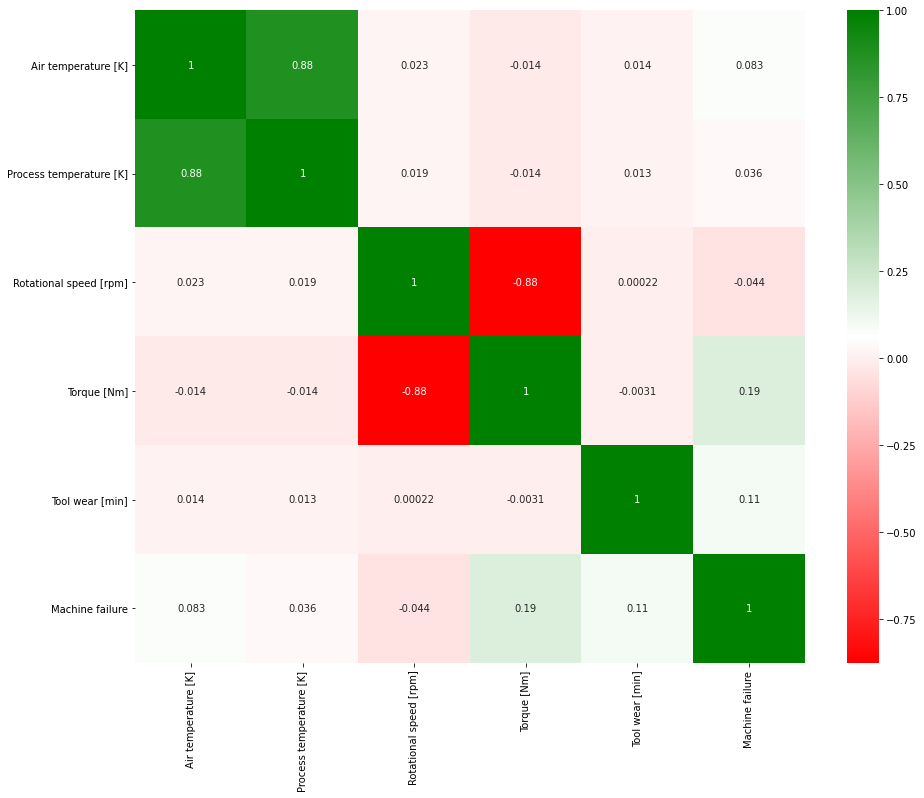

In [4]:
from matplotlib.colors import LinearSegmentedColormap

corr = df.iloc[:, 1:7].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','white','green'])

fig, ax = plt.subplots(figsize=(15,12)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap=cmap, annot=True,
           ax=ax)

In [5]:
df2 = df.drop(['Process temperature [K]', 'Rotational speed [rpm]'], axis=1)

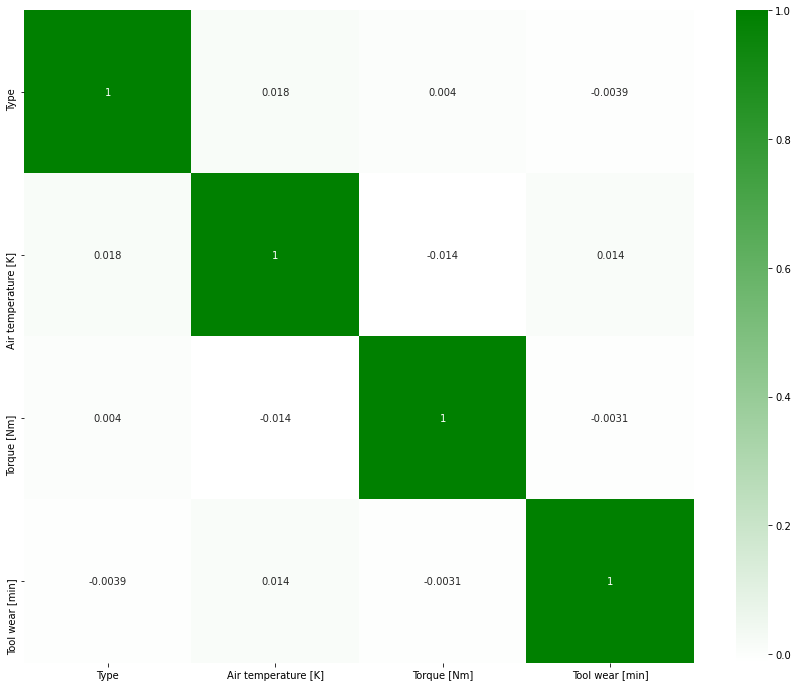

In [6]:
corr = df2.iloc[:, 0:4].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['white','green'])

fig, ax = plt.subplots(figsize=(15,12)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap=cmap, annot=True,
           ax=ax)

In [7]:
df2


,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,42.8,0,0
1,1,298.2,46.3,3,0
2,1,298.1,49.4,5,0
3,1,298.2,39.5,7,0
4,1,298.2,40.0,9,0
...,...,...,...,...,...
9995,2,298.8,29.5,14,0
9996,0,298.9,31.8,17,0
9997,2,299.0,33.4,22,0
9998,0,299.0,48.5,25,0


In [8]:
# Using df2 here gave a less accurate prediction.
y = df['Machine failure'].values
X = df.drop(['Machine failure'], axis=1).values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

print(len(df.loc[df['Machine failure']==1,]))
y_test.sum()

339


68

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [11]:
y_predict_test = clf.predict(X_test)

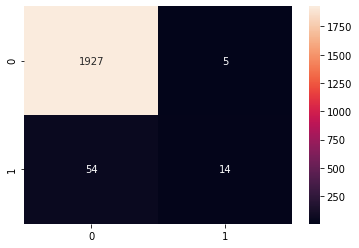

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.74      0.21      0.32        68

    accuracy                           0.97      2000
   macro avg       0.85      0.60      0.65      2000
weighted avg       0.96      0.97      0.96      2000



In [12]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test,y_predict_test))

In [13]:
# Using df2 here gave a less accurate prediction.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train, y_train)

In [14]:
y_predict_test = clf.predict(X_test)

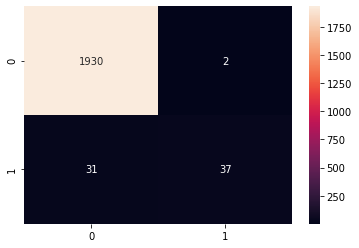

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.95      0.54      0.69        68

    accuracy                           0.98      2000
   macro avg       0.97      0.77      0.84      2000
weighted avg       0.98      0.98      0.98      2000



In [15]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test,y_predict_test))

In [16]:
from tensorflow.python.client import device_lib
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12661309355186082226
]
Num GPUs Available:  0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-2.0000311 ,  0.15253698,  1.28492423, -0.83216321,  0.908285  ,
         1.34202592],
       [-0.33749486,  0.75351989,  0.27319942, -1.17396867,  0.66654605,
        -1.32151275],
       [ 1.32504138,  0.85368371,  0.40809606, -0.18777587,  0.45502447,
         0.58996794],
       ...,
       [-0.33749486, -0.44844594, -1.14321531,  0.11480601, -0.6328008 ,
        -1.2275055 ],
       [-0.33749486,  1.10409326,  1.01513095,  0.05316896, -0.76374273,
        -0.4284439 ],
       [-0.33749486,  0.55319225,  1.15002759, -0.73130259,  0.63632868,
         0.41762132]])

In [18]:

import tensorflow as tf
from tensorflow.python.keras import backend as K
from keras import optimizers
from keras import Model
from keras.layers import Input, Dense
from keras.models import load_model
tf.debugging.set_log_device_placement(False)
try:
    model = load_model('./model.h5')

#sess = tf.compat.v1.Session()
#K.set_session(sess)

except:
    layer1 = Input(X_train.shape[1])
    layer2 = Dense(6, activation='relu')(layer1)
    layer3 = Dense(4, activation='relu')(layer2)
    layer4 = Dense(4, activation='relu')(layer3)
    output = Dense(1, activation='sigmoid')(layer4)

    model = Model(inputs=layer1, outputs=output)
    model.summary()


    opt = tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')


    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

    model.fit(X_train_scaled, y_train, batch_size=10, epochs=200)
    model.save('./model.h5')
    dot_img_file = './model_1.png'
    tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
800/800 [==============================] - 14s 1ms/step - loss: 0.4436 - accuracy: 0.9216
Epoch 2/200
800/800 [========

In [19]:
#y_predict_test = model.predict_classes(X_test)
y_predict_test = (model.predict(X_test_scaled) > 0.5).astype("int32")
print(y_predict_test.sum())
print(y_test.sum())

0
68


In [20]:
for i in range(2000):
    if(y_predict_test[i] or y_test[i]):
        print('%s => %d (expected %d)' % (X_test[i].tolist(), y_predict_test[i], y_test[i]))
        

[1.0, 302.0, 310.8, 1615.0, 29.0, 235.0] => 0 (expected 1)
[1.0, 303.6, 312.0, 1309.0, 52.9, 86.0] => 0 (expected 1)
[1.0, 304.0, 312.9, 1363.0, 62.5, 200.0] => 0 (expected 1)
[1.0, 303.0, 311.2, 1374.0, 48.2, 65.0] => 0 (expected 1)
[1.0, 302.5, 310.4, 1349.0, 55.1, 187.0] => 0 (expected 1)
[2.0, 300.8, 309.4, 1342.0, 62.4, 113.0] => 0 (expected 1)
[1.0, 300.7, 311.1, 2478.0, 13.4, 170.0] => 0 (expected 1)
[1.0, 301.9, 309.9, 1374.0, 48.5, 180.0] => 0 (expected 1)
[1.0, 302.5, 310.3, 1326.0, 58.5, 55.0] => 0 (expected 1)
[1.0, 297.5, 308.3, 2564.0, 12.8, 127.0] => 0 (expected 1)
[1.0, 303.0, 311.2, 1341.0, 51.0, 174.0] => 0 (expected 1)
[1.0, 296.8, 308.1, 1289.0, 62.0, 199.0] => 0 (expected 1)
[1.0, 302.6, 311.0, 1369.0, 60.0, 93.0] => 0 (expected 1)
[1.0, 303.5, 312.0, 1366.0, 54.5, 30.0] => 0 (expected 1)
[1.0, 301.9, 310.4, 1370.0, 51.7, 153.0] => 0 (expected 1)
[1.0, 302.0, 310.4, 1357.0, 58.0, 108.0] => 0 (expected 1)
[1.0, 302.0, 310.5, 1370.0, 44.4, 85.0] => 0 (expected 1)
[1.

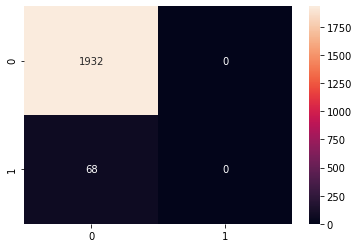

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.00      0.00      0.00        68

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test,y_predict_test))